# First example

Toy example -- use to give first motivation for lecture on features (improving performance).

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_boston()

In [3]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
df = data.data

In [5]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX',
        'RM','AGE','DIS','RAD','TAX',
        'PTRATIO','B','LSTAT']

In [6]:
df = pd.DataFrame(df, columns=cols)

In [7]:
train_X, test_X, train_y, test_y = train_test_split(df, data.target, test_size=0.2)

In [8]:
cats = ['CHAS','RAD']
cons = ['CRIM','ZN','INDUS','NOX','RM',
        'AGE','DIS','TAX','PTRATIO','B'
        'LSTAT']

In [9]:
# Log transform 

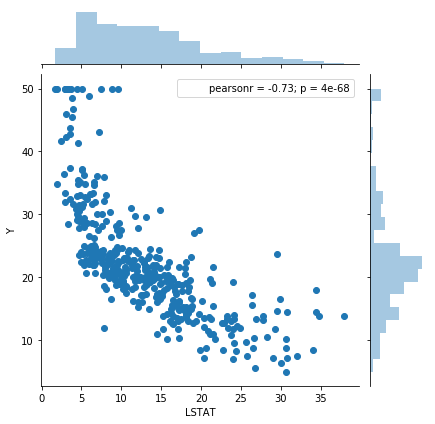

In [12]:
sns.jointplot(train_X['LSTAT'], train_y)\
   .set_axis_labels('LSTAT','Y')
plt.savefig('figures/untransformed_lstat.png')

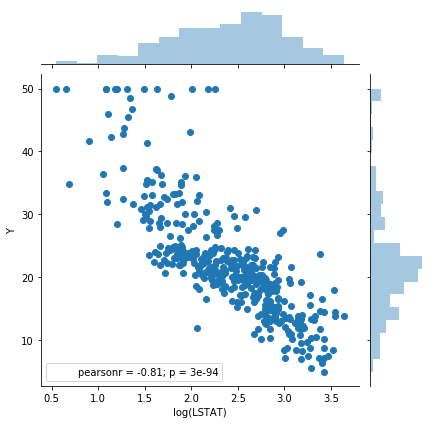

In [13]:
sns.jointplot(np.log(train_X['LSTAT']), train_y)\
   .set_axis_labels('log(LSTAT)','Y')
plt.savefig('figures/transformed_lstat.png')

In [18]:
from sklearn.linear_model import ElasticNetCV

In [19]:
en = ElasticNetCV(cv = 5)

In [20]:
en.fit(np.log(train_X[['LSTAT']]), train_y)
en.score(np.log(test_X[['LSTAT']]), test_y)

0.74651286928253746

In [21]:
en.fit(train_X[['LSTAT']], train_y)
en.score(test_X[['LSTAT']], test_y)

0.57894475666257272